___

<a href='http://www.pieriandata.com'> <img src='./Pierian_Data_Logo.png' /></a>
___
# Predicting interactions with advertisments - 
# A Logistic Regression Project 


In this project we are working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv("advertising.csv")

**Check the head of ad_data**

In [3]:
ad_data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

## Exploratory Data Analysis

Let's use seaborn to explore the data!

<AxesSubplot:xlabel='Age', ylabel='Count'>

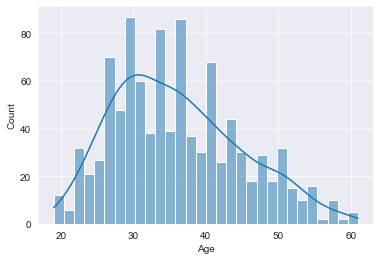

In [6]:
sns.set_style('darkgrid')
sns.histplot(data = ad_data, x = 'Age', bins = 30, kde = True)

most of the advertising data collected is based on people around 30 year of old

**Create a jointplot showing Area Income versus Age.**

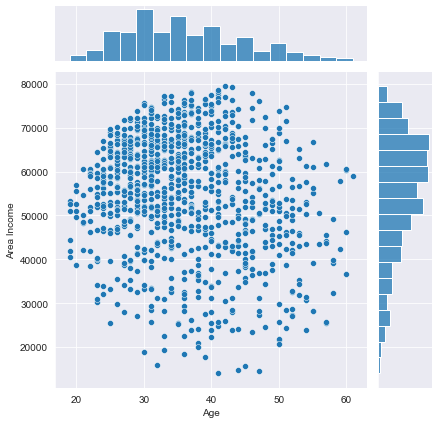

In [7]:
sns.jointplot(data = ad_data, x = 'Age', y = 'Area Income')

**The jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

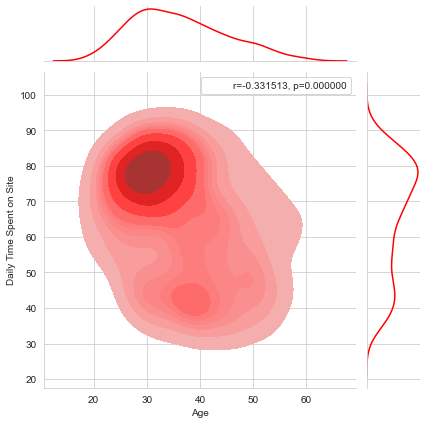

In [8]:
import scipy.stats as stats
sns.set_style('whitegrid')
graph = sns.jointplot(data=ad_data ,x = 'Age', y = 'Daily Time Spent on Site', kind = 'kde', shade = True, color = 'red')  #kind = 'hex'
r, p = stats.pearsonr(ad_data['Age'], ad_data['Daily Time Spent on Site'])
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])


** a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

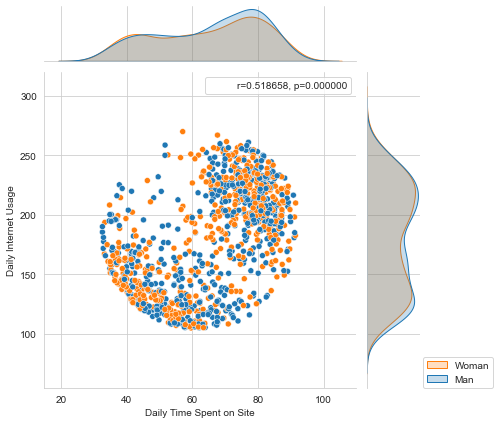

In [9]:
graph = sns.jointplot(data=ad_data ,x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', hue = 'Male', color = 'green')  #kind = 'hex'
r, p = stats.pearsonr(ad_data['Daily Time Spent on Site'], ad_data['Daily Internet Usage'])
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.legend(labels = ('Woman', 'Man'), loc = (1.04, 0))

** Finally, a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

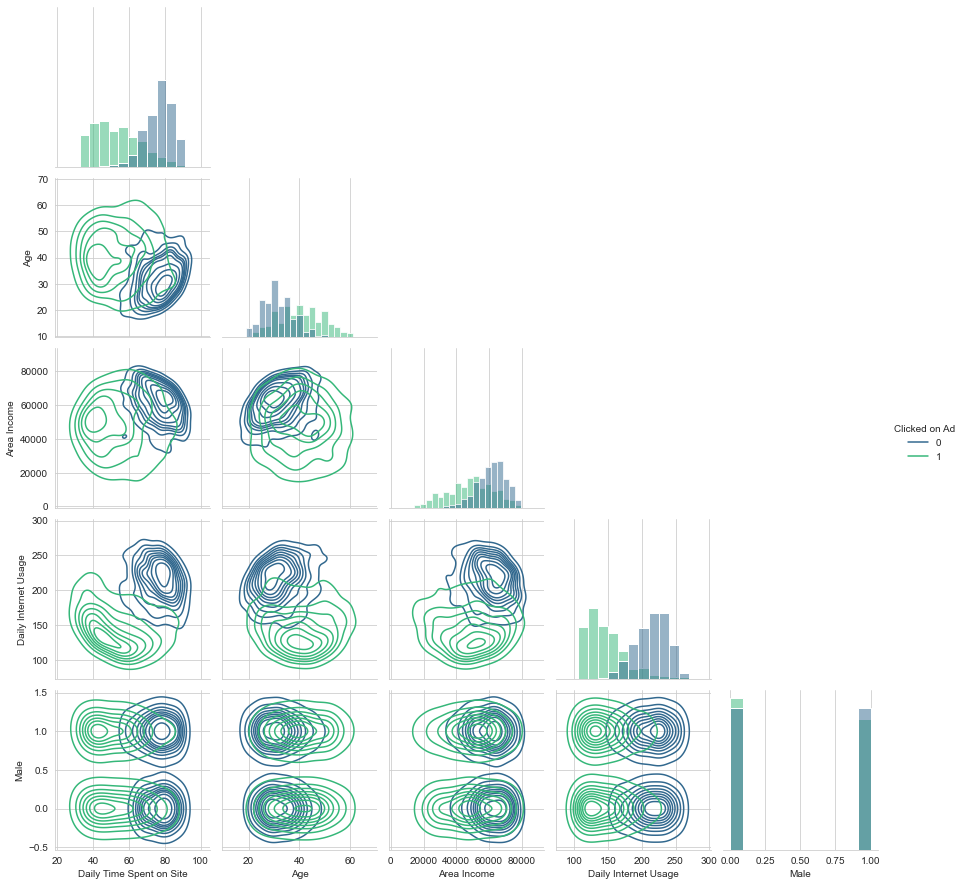

In [10]:
sns.pairplot(data = ad_data, hue = 'Clicked on Ad', palette = 'viridis', corner = True, kind = 'kde', diag_kind = 'hist')

# ... some more EDA

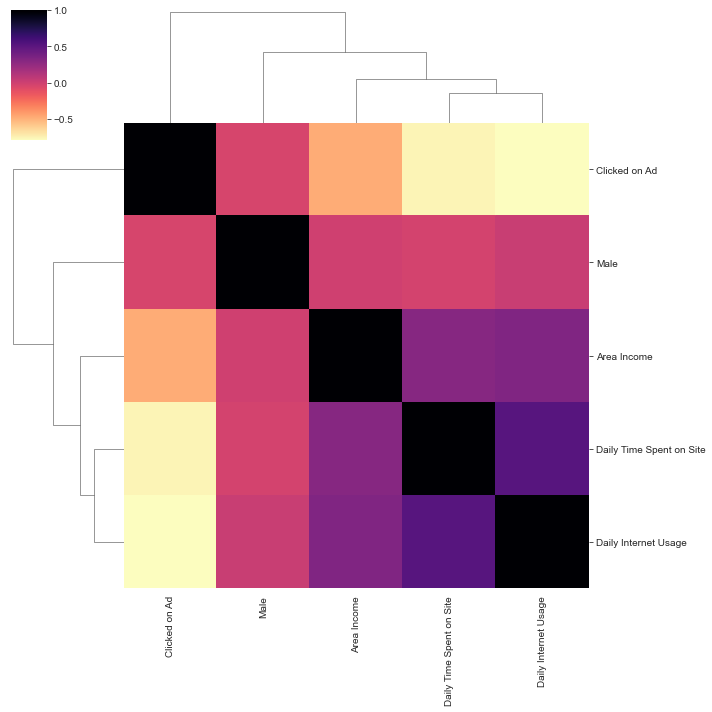

In [11]:
sns.clustermap(data = ad_data.drop('Age', axis=1).corr(), cmap = 'magma_r')

In [12]:
ad_data.drop(['Ad Topic Line', 'City', 'Country'],axis=1, inplace = True)


# Time: 
Working with the 'Timestamp' Data

In [13]:
type(ad_data['Timestamp'][0])

str

In [14]:
ad_data['Timestamp'] = pd.to_datetime(ad_data["Timestamp"])
ad_data['Timestamp'].dtype

dtype('<M8[ns]')

In [15]:
ad_data['hour'] = ad_data['Timestamp'].apply(lambda x: x.hour)
ad_data['month'] = ad_data['Timestamp'].apply(lambda x: x.month)
ad_data['day'] = ad_data['Timestamp'].apply(lambda x: x.day_of_week)
ad_data[['hour', 'day','month']].head()

hour  day  month
0     0    6      3
1     1    0      4
2    20    6      3
3     2    6      1
4     3    4      6

<AxesSubplot:xlabel='hour', ylabel='Count'>

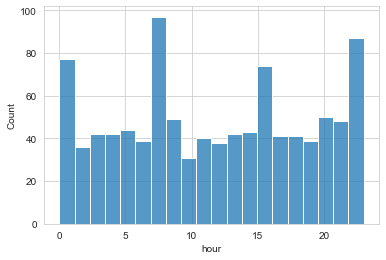

In [16]:
sns.histplot(data = ad_data, x = 'hour', bins = 20)

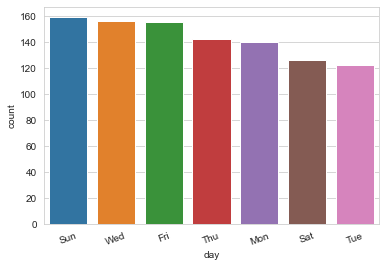

In [29]:
sns.countplot(x = 'day',
              data = ad_data,
              order = ad_data['day'].value_counts().index)
plt.xticks(np.arange(7), ['Sun', 'Wed', 'Fri', 'Thu', 'Mon', 'Sat', 'Tue'],rotation=20)
plt.show()

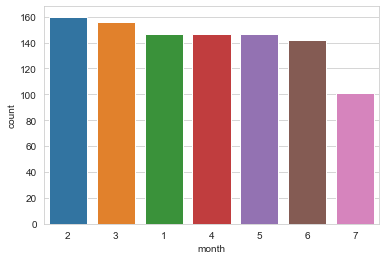

In [22]:
sns.countplot(x = 'month',
              data = ad_data,
              order = ad_data['month'].value_counts().index)
plt.show()

data is collected during Jan - Jul. 

In [30]:
months = pd.get_dummies(ad_data['month'], drop_first=True)
months

2  3  4  5  6  7
0    0  1  0  0  0  0
1    0  0  1  0  0  0
2    0  1  0  0  0  0
3    0  0  0  0  0  0
4    0  0  0  0  1  0
..  .. .. .. .. .. ..
995  1  0  0  0  0  0
996  0  0  1  0  0  0
997  1  0  0  0  0  0
998  0  1  0  0  0  0
999  0  0  0  0  1  0

[1000 rows x 6 columns]

In [31]:
months.rename(columns = {2: "Feb", 3: "Mar", 4: "Apr", 5:"May", 6:"Jun", 7:"Jul"}, inplace = True)
months

Feb  Mar  Apr  May  Jun  Jul
0      0    1    0    0    0    0
1      0    0    1    0    0    0
2      0    1    0    0    0    0
3      0    0    0    0    0    0
4      0    0    0    0    1    0
..   ...  ...  ...  ...  ...  ...
995    1    0    0    0    0    0
996    0    0    1    0    0    0
997    1    0    0    0    0    0
998    0    1    0    0    0    0
999    0    0    0    0    1    0

[1000 rows x 6 columns]

In [32]:
ad_data.drop("Timestamp", axis = 1, inplace=True)
ad_data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
0                     68.95   35     61833.90                256.09     0   
1                     80.23   31     68441.85                193.77     1   
2                     69.47   26     59785.94                236.50     0   
3                     74.15   29     54806.18                245.89     1   
4                     68.37   35     73889.99                225.58     0   

   Clicked on Ad  hour  month  day  
0              0     0      3    6  
1              0     1      4    0  
2              0    20      3    6  
3              0     2      1    6  
4              0     3      6    4

# Logistic Regression

Now it's time to do a train test split, and train our model!

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'hour', 'month',
       'day'],
      dtype='object')

In [35]:
y = ad_data['Clicked on Ad']
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'hour', 'month',
       'day']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

## Predictions and Evaluations
** Now predict values for the testing data.**

In [38]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       157
           1       0.93      0.87      0.90       143

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



array([[148,   9],
       [ 18, 125]], dtype=int64)